In [24]:
import sys
import cPickle
import matplotlib as mpl
#mpl.use('Agg')
%matplotlib inline
from matplotlib import pyplot as plt
from pixels import PixelReader
import numpy as np
import traceback

In [3]:
# Auxilary functions
def cut_contains(cv, v):
    for c in cv:
        if c[0]<=v and c[1]>=v:
            return True
    return False

def pixels_affected(cs, v):
    return [int(p) for p in cs if cut_contains(cs[p], v)]

def affected_pos(cs, v):
    pixels = pixels_affected(cs, v)
    pos = np.array([pr.getXY(p) for p in pixels])
    return np.mean(pos, 0)

def get_track(cs, time_range):
    start_v = time_range[0]
    end_v = time_range[1]
    return np.vstack([affected_pos(cs, v) for v in range(start_v, end_v)])


## Plot Tracks

[INFO] Working on 1
[INFO] Working on 2


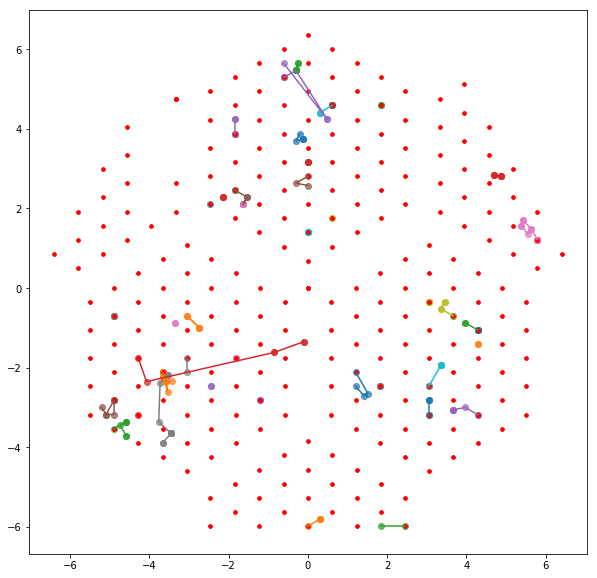

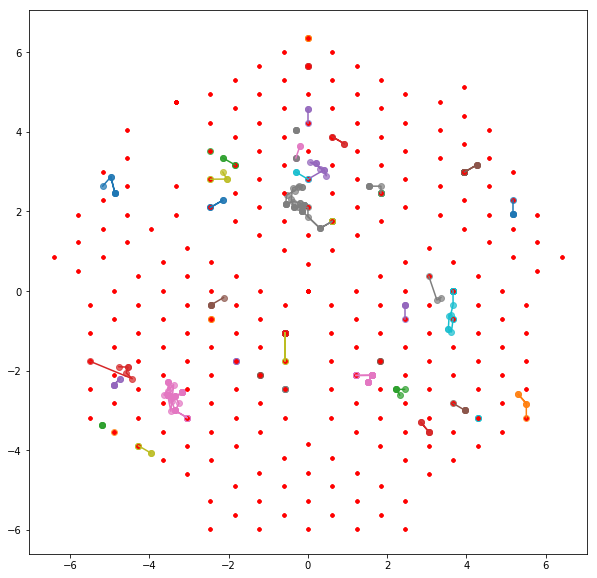

In [5]:
pr = PixelReader()
start = 1
end = 3

for cut_id in range(start, end):
    try: 
        print '[INFO] Working on', cut_id
        cut_data = cPickle.load(open("outputs/coincident_signals/%d.pickle" % cut_id, "r"))
        cs = cut_data['coincident_signals']
        signals = [p[0:2] for p in cut_data['peaks']]
        plt.figure(figsize=(10,10))
        pr.plot()
        for s in signals:
            pos = get_track(cs, s)
            plt.scatter(pos[:,0], pos[:,1], alpha=0.7)
            plt.plot(pos[:,0],pos[:,1])
        #plt.savefig("outputs/tracks/%d.png" % cut_id)
    except Exception as e:
        print "[ERROR] Exception caught!"
        print e

## Plot 3D tracks

In [20]:
def affected_pos_with_spread(cs, v):
    pixels = pixels_affected(cs, v)
    pos = np.array([pr.getXY(p) for p in pixels])
    std = np.std(pos, 0)
    spread = np.sqrt(std[0]**2+std[1]**2)
    return np.hstack([np.mean(pos, 0), [spread]])

def get_track_with_spread(cs, time_range):
    start_v = time_range[0]
    end_v = time_range[1]
    return np.vstack([affected_pos_with_spread(cs, v) for v in range(start_v, end_v)])

[INFO] Working on 898


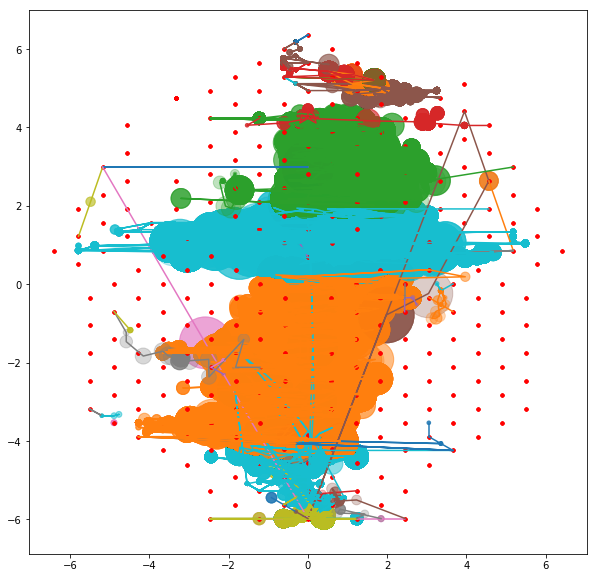

In [44]:
pr = PixelReader()
start = 898
end = start+1

for cut_id in range(start, end):
    try: 
        print '[INFO] Working on', cut_id
        cut_data = cPickle.load(open("outputs/coincident_signals/%d.pickle" % cut_id, "r"))
        cs = cut_data['coincident_signals']
        signals = [p[0:2] for p in cut_data['peaks']]
        plt.figure(figsize=(10,10))
        pr.plot()
        for s in signals:
            pos = get_track_with_spread(cs, s)
            #print pos
            plt.scatter(pos[:,0], pos[:,1], marker='o', s=100*pos[:,2]**2, alpha=0.3)
            plt.plot(pos[:,0],pos[:,1])
        #plt.savefig("outputs/tracks/%d.png" % cut_id)
    except Exception as e:
        print "[ERROR] Exception caught!"
        print e

In [ ]:
## Subsampling

[INFO] Working on 884


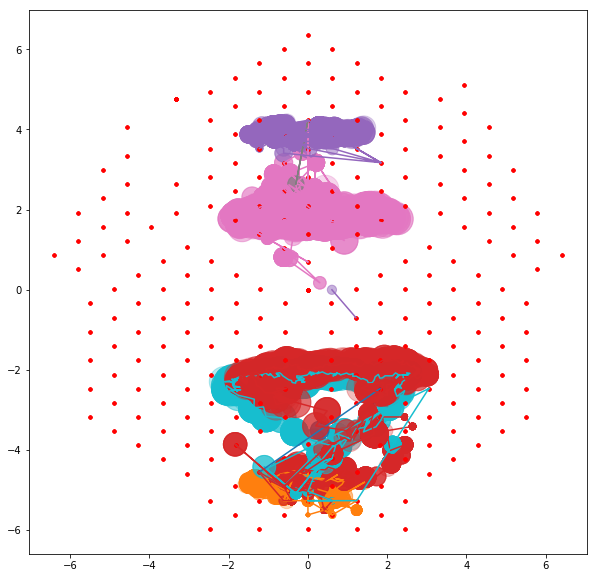

In [77]:
pr = PixelReader()
start = 884
end = start+1

for cut_id in range(start, end):
    try: 
        print '[INFO] Working on', cut_id
        cut_data = cPickle.load(open("outputs/coincident_signals/%d.pickle" % cut_id, "r"))
        cs = cut_data['coincident_signals']
        signals = [p[0:2] for p in cut_data['peaks']]
        plt.figure(figsize=(10,10))
        pr.plot()
        for s in signals:
            pos = get_track_with_spread(cs, s)
            pos_downsample = pos[::1]
            plt.scatter(pos_downsample[:,0], pos_downsample[:,1], marker='o', s=100*pos_downsample[:,2]**2, alpha=0.3)
            plt.plot(pos[:,0],pos[:,1])
        #plt.savefig("outputs/tracks/%d.png" % cut_id)
    except Exception as e:
        print "[ERROR] Exception caught!"
        print e

## Spread curves
Look at how spread changes with time. 

In [14]:
pr = PixelReader()
def affected_spread(cs, v):
    pixels = pixels_affected(cs, v)
    pos = np.array([pr.getXY(p) for p in pixels])
    std = np.std(pos, 0)
    spread = np.sqrt(std[0]**2+std[1]**2)
    return spread

def get_spread(cs, time_range):
    start_t = time_range[0]
    end_t = time_range[1]
    return np.vstack([affected_spread(cs, t) for t in range(start_t, end_t)])

[INFO] Working on 884


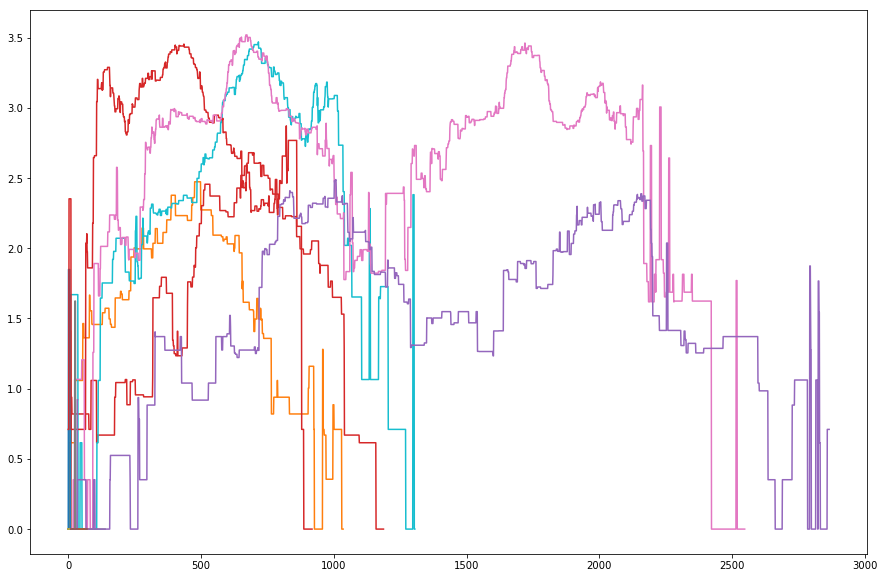

In [78]:
pr = PixelReader()
start = 884
end = start+1

for cut_id in range(start, end):
    try: 
        print '[INFO] Working on', cut_id
        cut_data = cPickle.load(open("outputs/coincident_signals/%d.pickle" % cut_id, "r"))
        cs = cut_data['coincident_signals']
        signals = [p[0:2] for p in cut_data['peaks']]
        plt.figure(figsize=(15,10))
        #pr.plot()
        for s in signals:
            pos = get_spread(cs, s)
            #plt.plot(np.linspace(0,1, len(pos)), pos)
            plt.plot(pos)
        #plt.savefig("outputs/tracks/%d.png" % cut_id)
    except Exception as e:
        print "[ERROR] Exception caught!"
        print e

## Reorganize into functions

In [16]:
def plot_spreads(tod_no):
    pr = PixelReader()
    start = tod_no
    end = start+1

    for cut_id in range(start, end):
        try: 
            print '[INFO] Working on', cut_id
            cut_data = cPickle.load(open("outputs/coincident_signals/%d.pickle" % cut_id, "r"))
            cs = cut_data['coincident_signals']
            signals = [p[0:2] for p in cut_data['peaks']]
            plt.figure(figsize=(15,10))
            #pr.plot()
            for s in signals:
                pos = get_spread(cs, s)
                #plt.plot(np.linspace(0,1, len(pos)), pos)
                plt.plot(pos)
            #plt.savefig("outputs/tracks/%d.png" % cut_id)
        except Exception as e:
            print "[ERROR] Exception caught!"
            print e
            traceback.print_exc(file=sys.stdout)

def plot_tracks_with_spread(tod_no, downsample=1):
    pr = PixelReader()
    start = tod_no
    end = start+1

    for cut_id in range(start, end):
        try: 
            print '[INFO] Working on', cut_id
            cut_data = cPickle.load(open("outputs/coincident_signals/%d.pickle" % cut_id, "r"))
            cs = cut_data['coincident_signals']
            signals = [p[0:2] for p in cut_data['peaks']]
            plt.figure(figsize=(10,10))
            pr.plot()
            for s in signals:
                pos = get_track_with_spread(cs, s)
                pos_downsample = pos[::downsample]
                plt.scatter(pos_downsample[:,0], pos_downsample[:,1], marker='o', s=3000*pos_downsample[:,2]**2, alpha=0.1)
                plt.plot(pos[:,0],pos[:,1])
            #plt.savefig("outputs/tracks/%d.png" % cut_id)
        except Exception as e:
            print "[ERROR] Exception caught!"
            print e
            traceback.print_exc(file=sys.stdout)
            
def plot_tracks(tod_no):
    pr = PixelReader()
    start = 1
    end = 3

    for cut_id in range(start, end):
        try: 
            print '[INFO] Working on', cut_id
            cut_data = cPickle.load(open("outputs/coincident_signals/%d.pickle" % cut_id, "r"))
            cs = cut_data['coincident_signals']
            signals = [p[0:2] for p in cut_data['peaks']]
            plt.figure(figsize=(10,10))
            pr.plot()
            for s in signals:
                pos = get_track(cs, s)
                plt.scatter(pos[:,0], pos[:,1], alpha=0.7)
                plt.plot(pos[:,0],pos[:,1])
            #plt.savefig("outputs/tracks/%d.png" % cut_id)
        except Exception as e:
            print "[ERROR] Exception caught!"
            print e
            traceback.print_exc(file=sys.stdout)

[INFO] Working on 554
[INFO] Working on 554


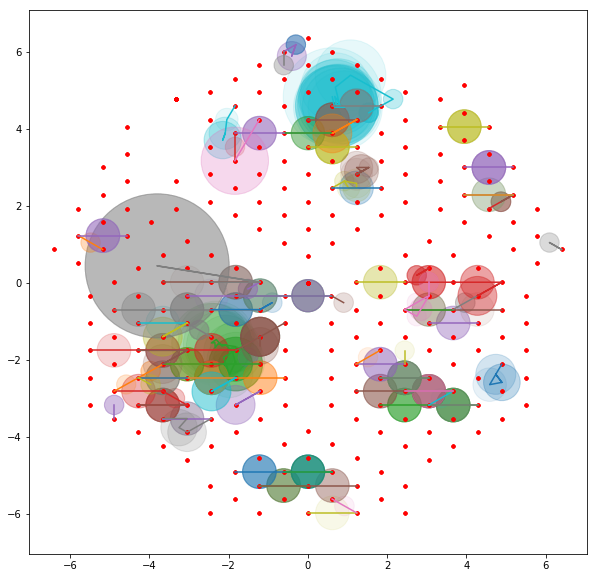

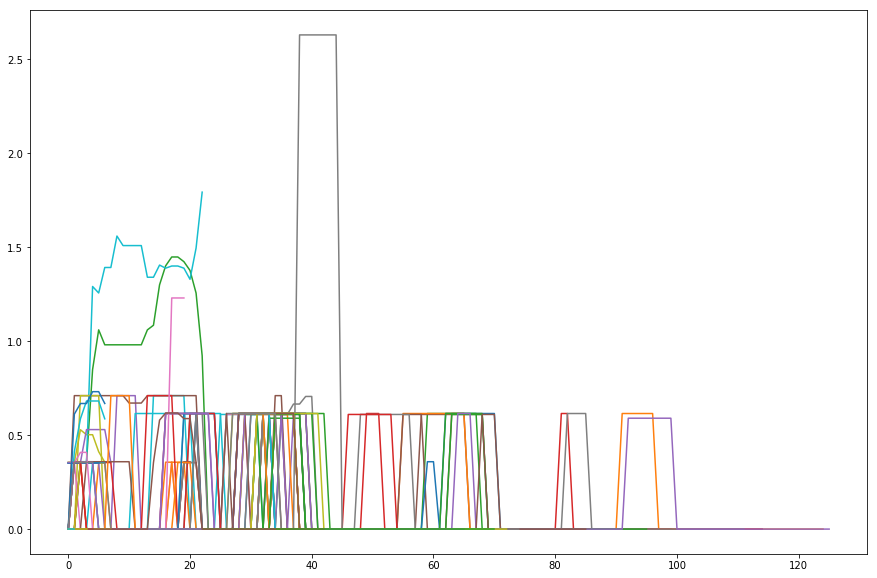

In [98]:
tod_id = 554
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id)

[INFO] Working on 553
[INFO] Working on 553


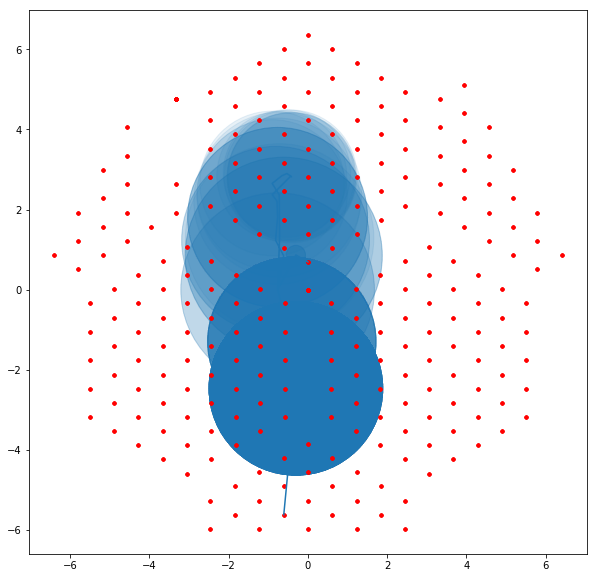

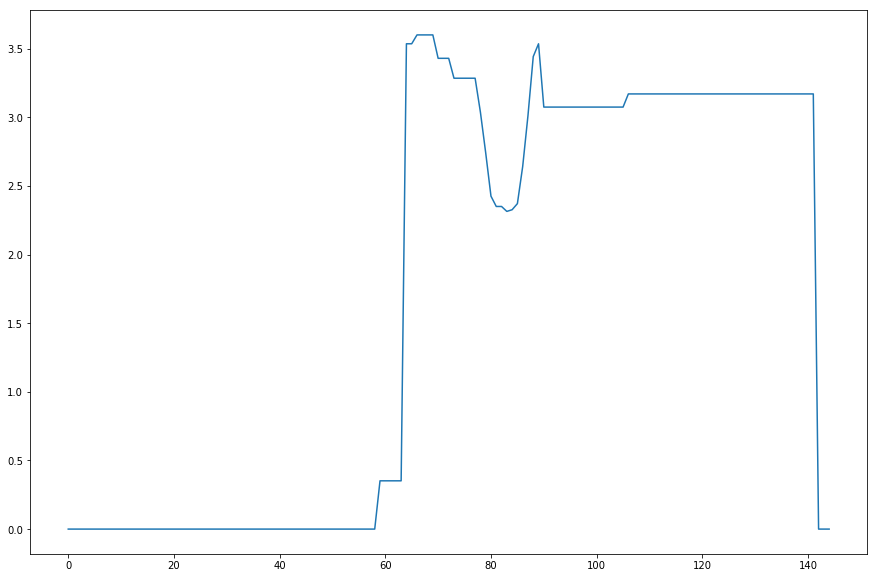

In [96]:
tod_id = 553
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id)

[INFO] Working on 466
[INFO] Working on 466


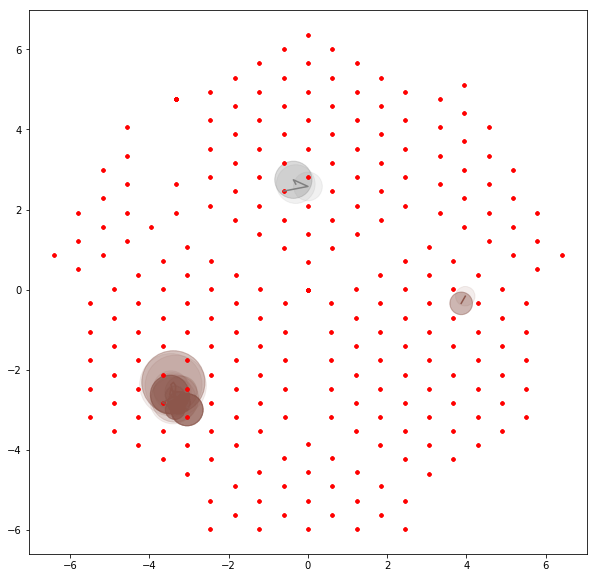

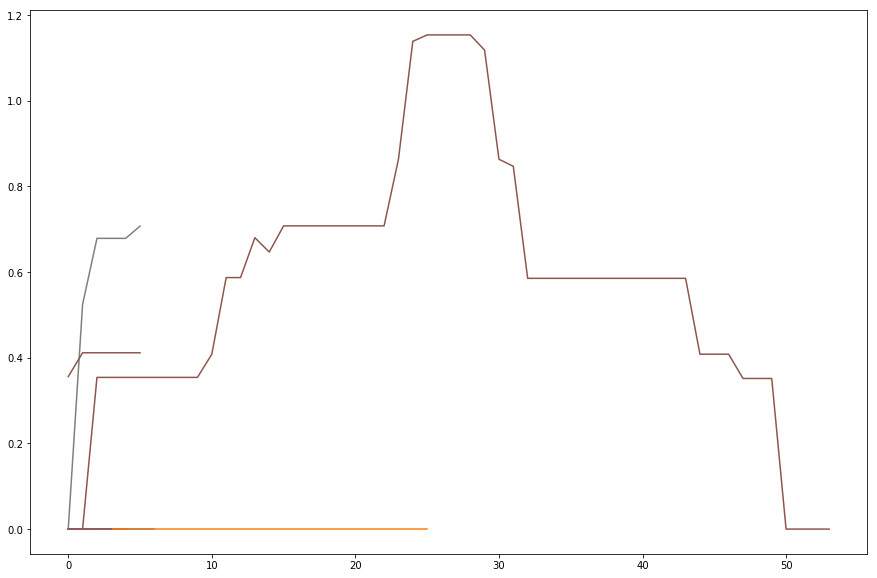

In [14]:
tod_id = 466
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id)

This is an interesting example of transiant signals that one can look into

[INFO] Working on 339
[INFO] Working on 339


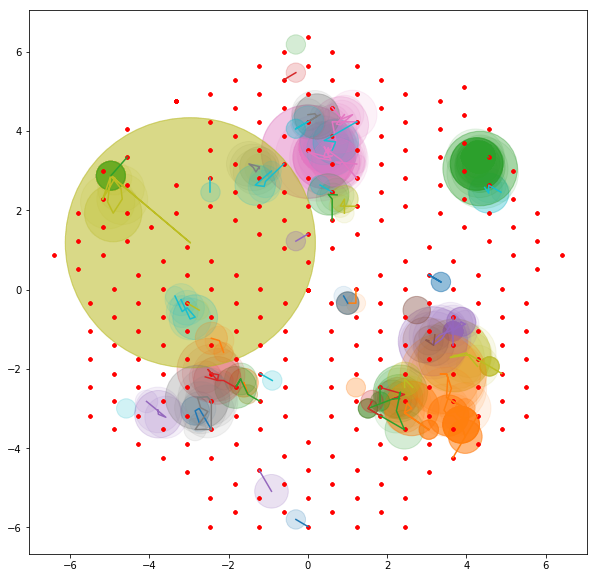

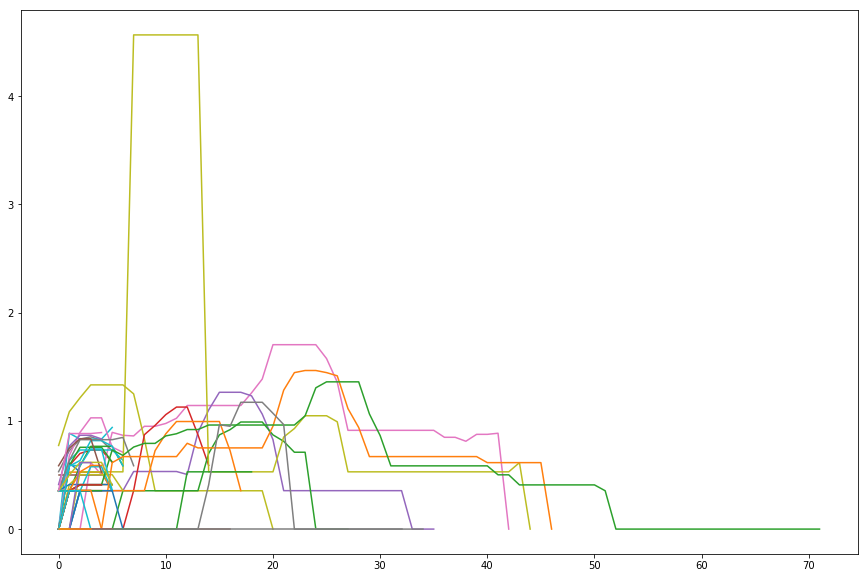

In [100]:
tod_id = 339
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id)

[INFO] Working on 325
[INFO] Working on 325


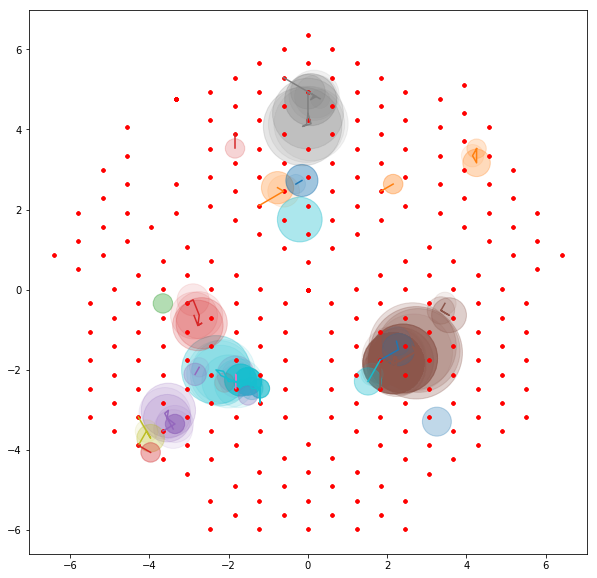

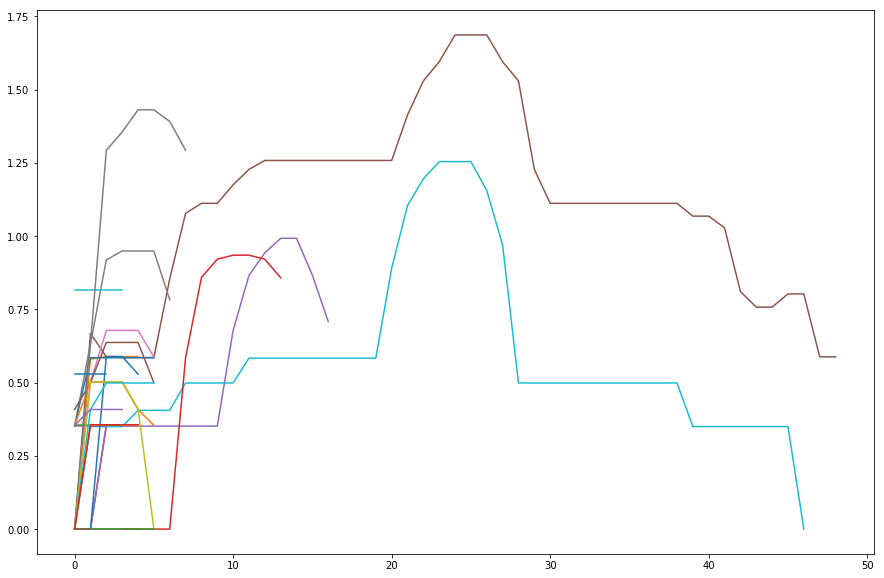

In [101]:
tod_id = 325
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id)

[INFO] Working on 269
[INFO] Working on 269


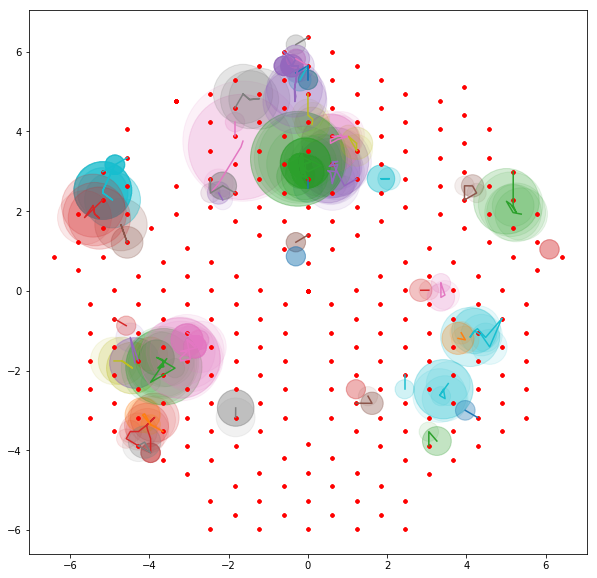

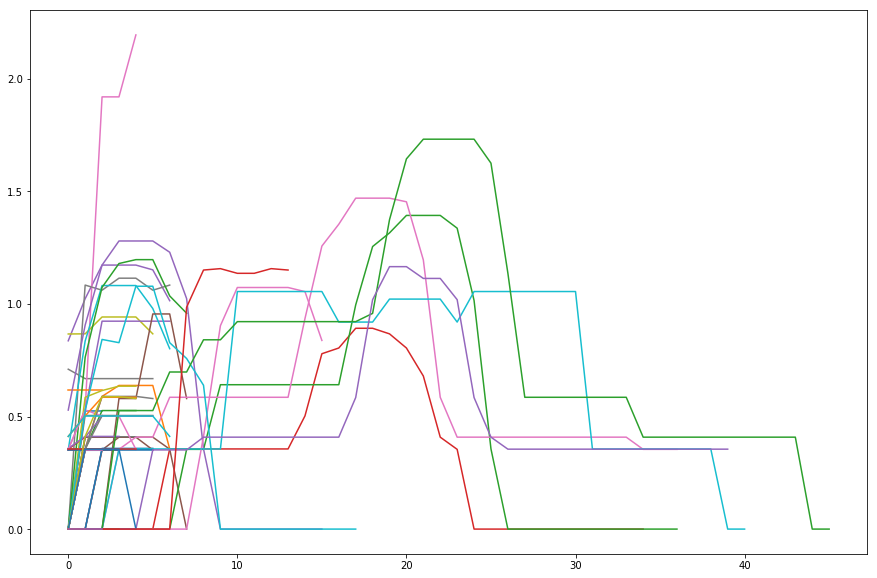

In [102]:
tod_id = 269
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id)

[INFO] Working on 244
[INFO] Working on 244


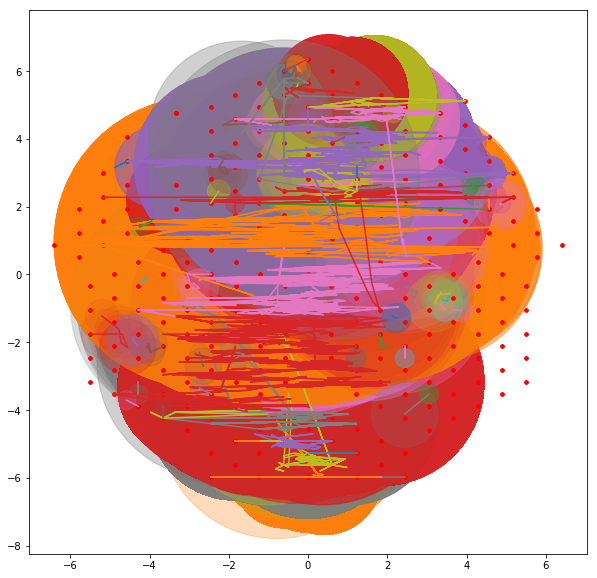

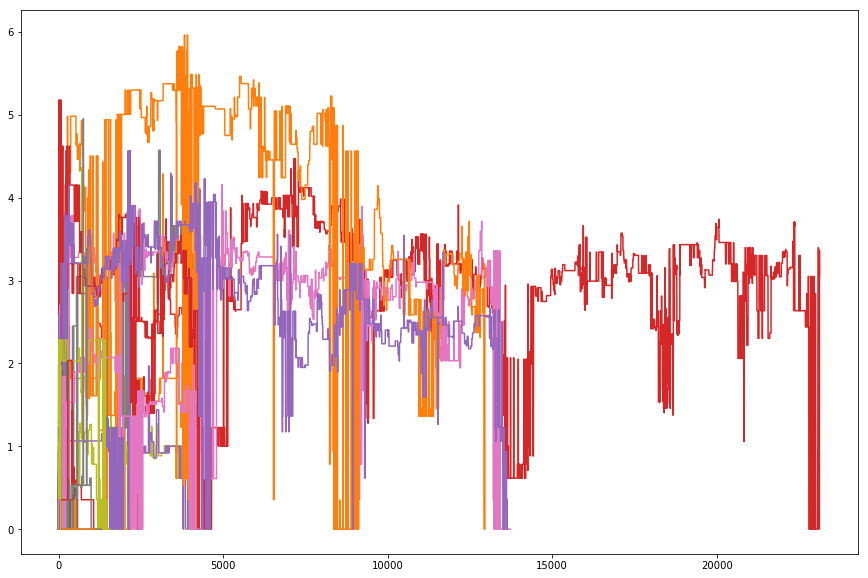

In [103]:
tod_id = 244
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id)

[INFO] Working on 213
[INFO] Working on 213


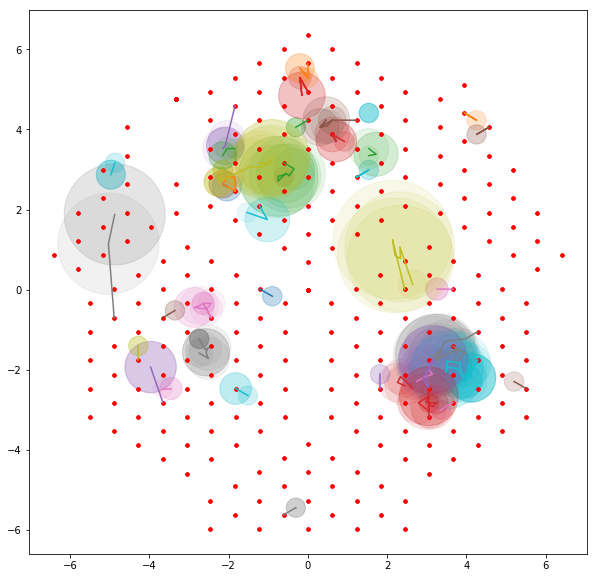

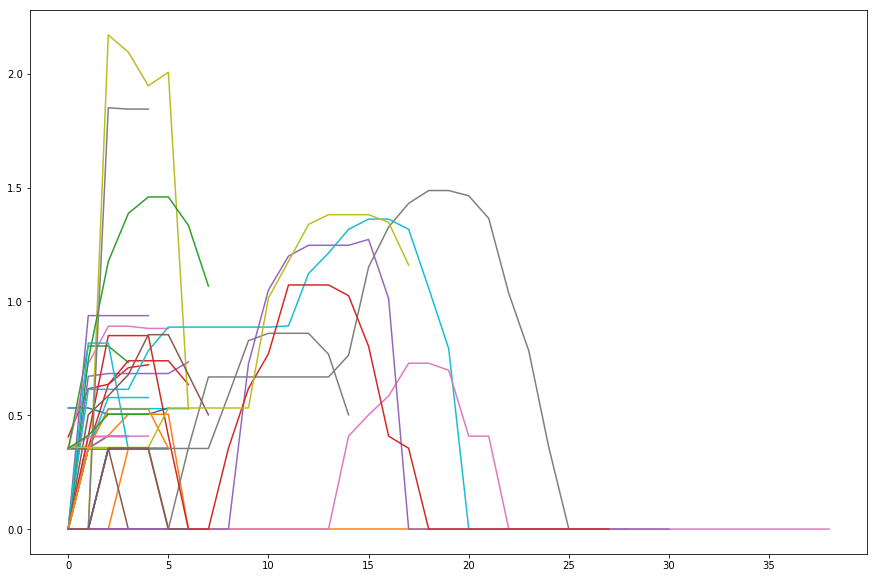

In [104]:
tod_id = 213
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id)

[INFO] Working on 1182
[INFO] Working on 1182


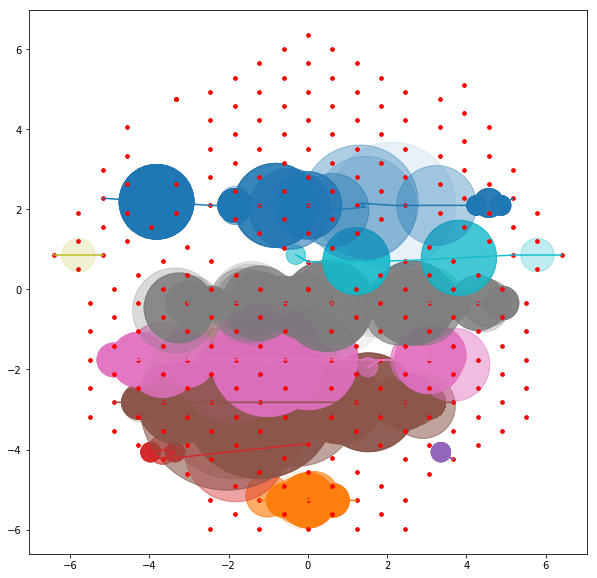

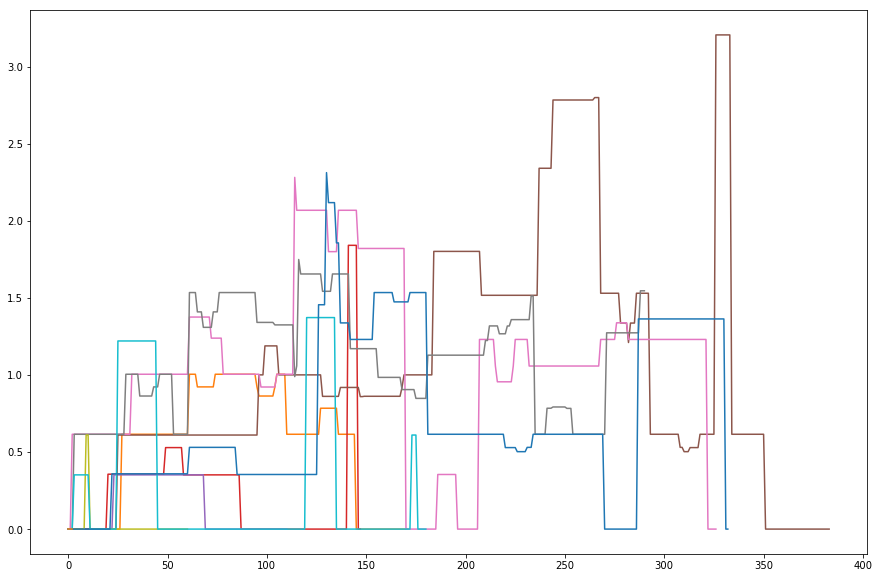

In [105]:
tod_id = 1182
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id)

[INFO] Working on 884
[INFO] Working on 884


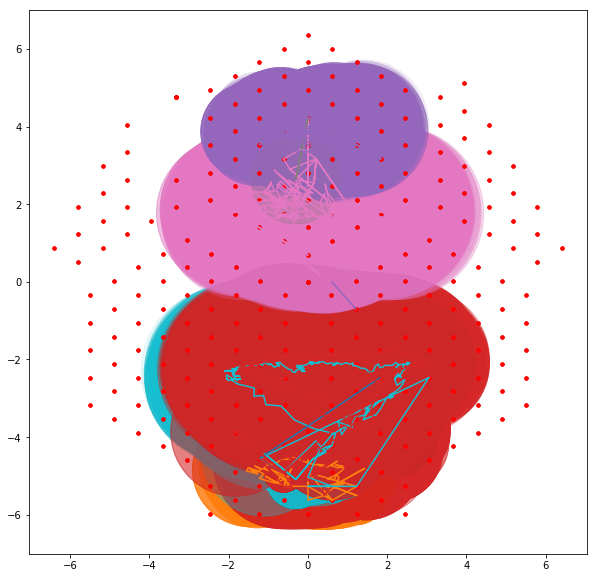

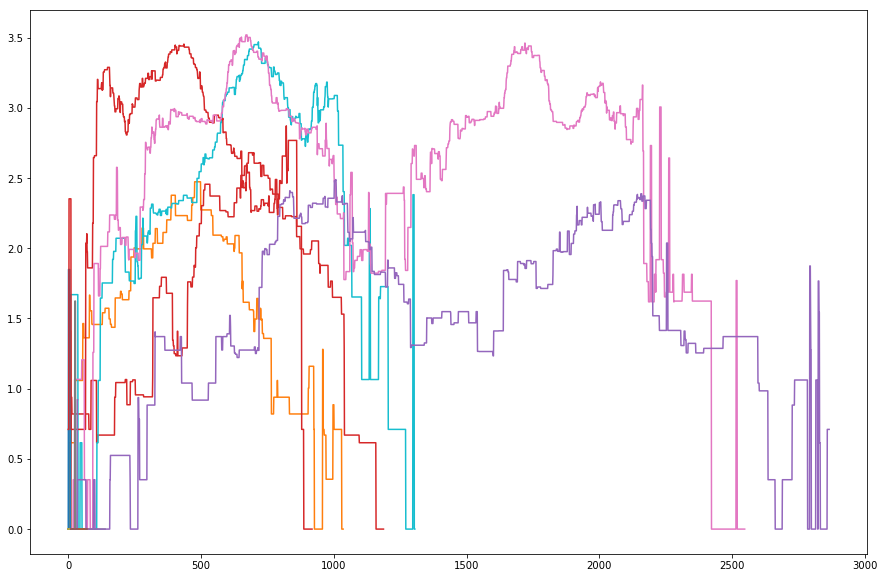

In [106]:
tod_id = 884
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id)

[INFO] Working on 1485
[INFO] Working on 1485


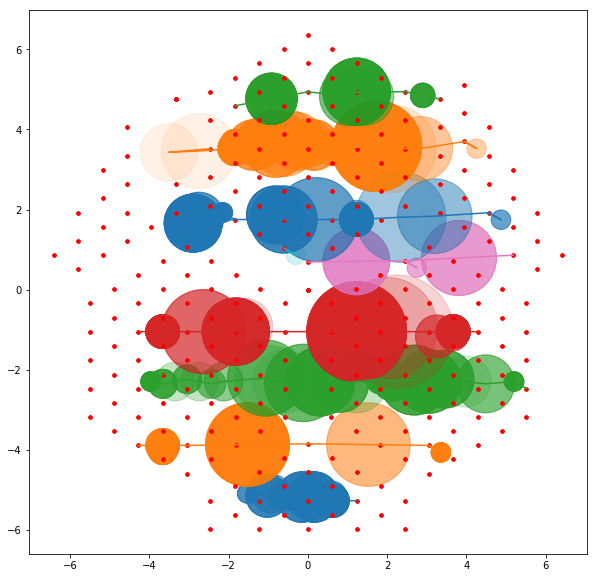

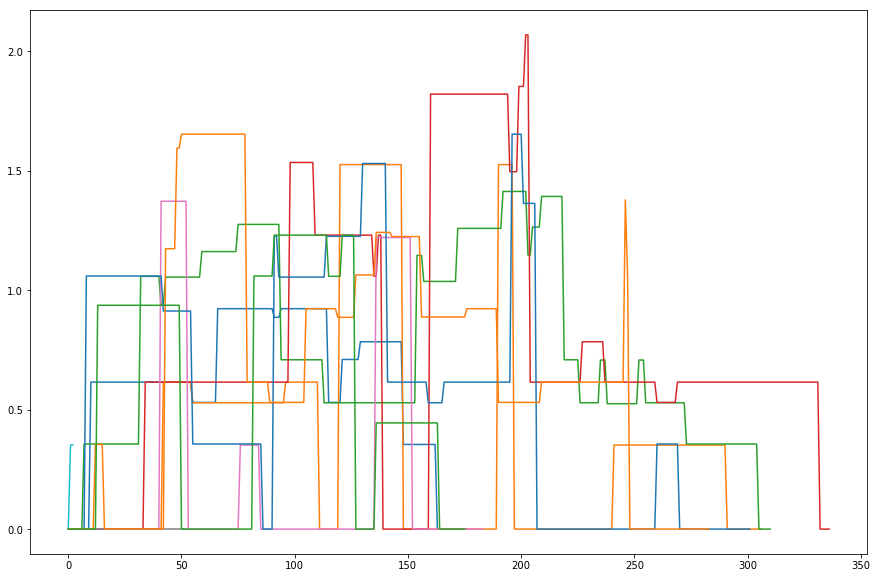

In [111]:
tod_id = 1485
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id)

[INFO] Working on 1533
[INFO] Working on 1533


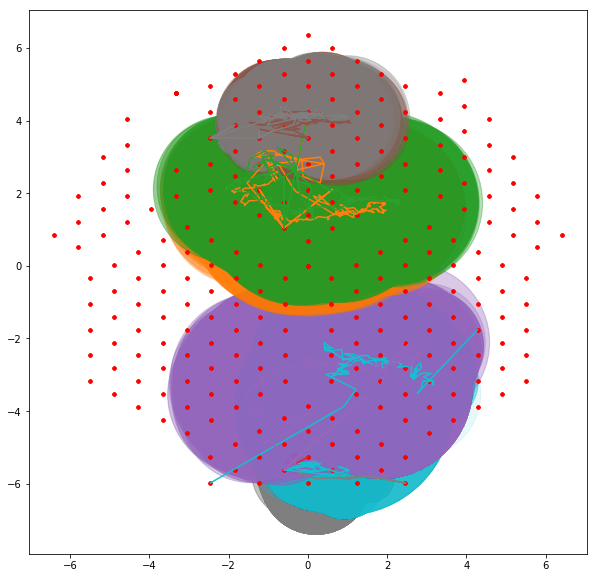

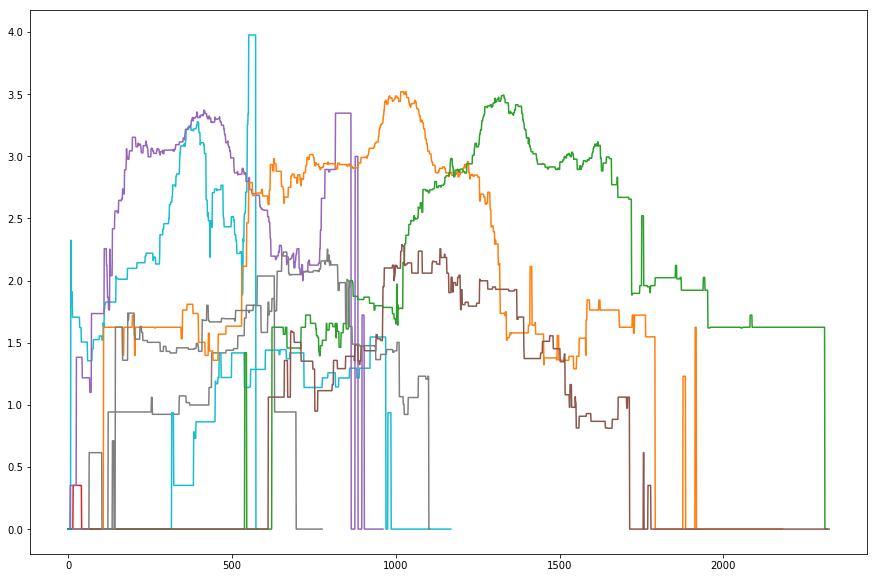

In [112]:
tod_id = 1533
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id)

## Intrapolate

In [12]:
from scipy.interpolate import spline

In [22]:
def plot_spreads(tod_no, convolve=1,sp=1):
    pr = PixelReader()
    start = tod_no
    end = start+1

    for cut_id in range(start, end):
        print '[INFO] Working on', cut_id
        cut_data = cPickle.load(open("outputs/coincident_signals/%d.pickle" % cut_id, "r"))
        cs = cut_data['coincident_signals']
        signals = [p[0:2] for p in cut_data['peaks']]
        plt.figure(figsize=(15,10))
        #pr.plot()
        for s in signals:
            try:
                spreads = np.transpose(get_spread(cs, s))[0]
                #plt.plot(np.linspace(0,1, len(pos)), pos)
                N = convolve
                #print spreads
                spreads_smooth = np.convolve(spreads, np.ones((N,))/N, mode='valid')
                xold = np.linspace(0, len(spreads_smooth), len(spreads_smooth))
                xnew = np.linspace(0, len(spreads_smooth), len(spreads_smooth)*sp)
                spreads_spline = spline(xold, spreads_smooth, xnew)
                #print spreads_smooth
                plt.plot(xnew, spreads_spline)
        #plt.savefig("outputs/tracks/%d.png" % cut_id)
            except Exception as e:
                print "[ERROR] Exception caught!"
                print e
                #traceback.print_exc(file=sys.stdout)

def plot_tracks_with_spread(tod_no, downsample=1):
    pr = PixelReader()
    start = tod_no
    end = start+1

    for cut_id in range(start, end):
        try: 
            print '[INFO] Working on', cut_id
            cut_data = cPickle.load(open("outputs/coincident_signals/%d.pickle" % cut_id, "r"))
            cs = cut_data['coincident_signals']
            signals = [p[0:2] for p in cut_data['peaks']]
            plt.figure(figsize=(10,10))
            pr.plot()
            for s in signals:
                pos = get_track_with_spread(cs, s)
                pos_downsample = pos[::downsample]
                print pos_downsample
                plt.scatter(pos_downsample[:,0], pos_downsample[:,1], marker='o', s=3000*pos_downsample[:,2]**2, alpha=0.1)
                plt.plot(pos[:,0],pos[:,1])
            #plt.savefig("outputs/tracks/%d.png" % cut_id)
        except Exception as e:
            print "[ERROR] Exception caught!"
            print e
            traceback.print_exc(file=sys.stdout)

[INFO] Working on 325
[[ 0.   -5.27  0.  ]]
[[-1.23        2.1         0.        ]
 [-0.61333333  2.45666667  0.5798084 ]
 [-0.7675      2.545       0.58893442]
 [-0.7675      2.545       0.58893442]
 [-0.7675      2.545       0.58893442]]
[[-2.44 -1.41  0.  ]
 [-2.44 -1.41  0.  ]]
[[-1.84   3.88   0.   ]
 [-1.84   3.88   0.   ]
 [-1.84   3.525  0.355]
 [-1.84   3.525  0.355]]
[[-3.66       -3.53        0.        ]
 [-3.66       -3.53        0.        ]
 [-3.355      -3.355       0.35163902]
 [-3.355      -3.355       0.35163902]
 [-3.355      -3.355       0.35163902]
 [-3.355      -3.355       0.35163902]
 [-3.355      -3.355       0.35163902]
 [-3.355      -3.355       0.35163902]
 [-3.355      -3.355       0.35163902]
 [-3.355      -3.355       0.35163902]
 [-3.35666667 -3.355       0.67821866]
 [-3.55181818 -3.21090909  0.8663851 ]
 [-3.6125     -3.09        0.94307233]
 [-3.52230769 -3.01538462  0.99267137]
 [-3.52230769 -3.01538462  0.99267137]
 [-3.55181818 -3.21090909  0.866385

[[-4.28       -3.89        0.        ]
 [-3.97       -4.065       0.35598455]
 [-3.97       -4.065       0.35598455]
 [-3.97       -4.065       0.35598455]
 [-3.97       -4.065       0.35598455]]
[[-2.745      -1.94        0.35415392]
 [-2.84666667 -2.11666667  0.40830272]
 [-2.84666667 -2.11666667  0.40830272]
 [-2.84666667 -2.11666667  0.40830272]]
[[ 0.61  4.59  0.  ]
 [ 0.61  4.59  0.  ]]
[INFO] Working on 325


/mnt/act3/users/yilun/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


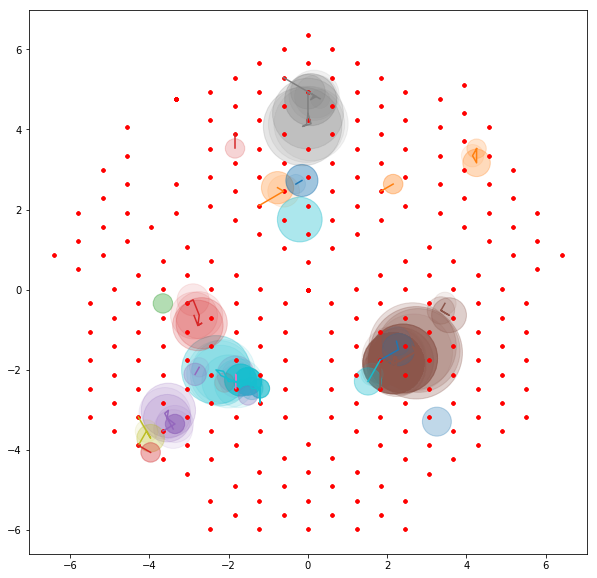

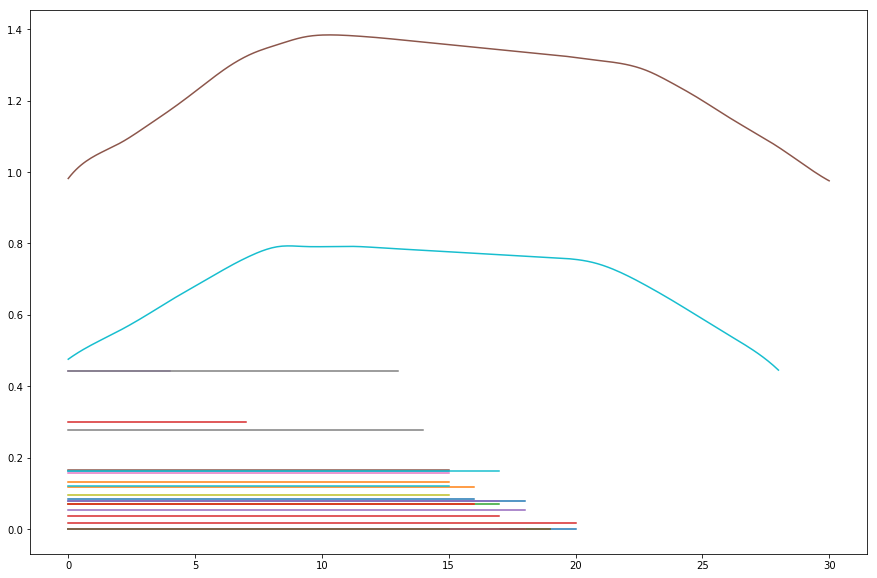

In [23]:
tod_id = 325
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id, convolve=20, sp=10)

[INFO] Working on 1485
[ERROR] Exception caught!
global name 'get_track_with_spread' is not defined
Traceback (most recent call last):
  File "<ipython-input-11-1ebd399803a4>", line 45, in plot_tracks_with_spread
    pos = get_track_with_spread(cs, s)
NameError: global name 'get_track_with_spread' is not defined
[INFO] Working on 1485
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.615       0.615       0.615       0.615
  0.615       0.615       0.615       0.615       0.615       0.615       0.615
  0.615       0.615       0.615       0.615       0.615       0.615       0.615
  0.615       0.615       0.615       0.615       0.615       0.615       0.615
  0.615       0.615       0.615       0.615       0.615       0.615       0.615
  0.615       0.615       0.615       0.615       0.615       0.615       0.615
  0.615       0.615       0.615       0.615       0.615       0.615
  0.53005241  0.53005241  0.53005241  

/mnt/act3/users/yilun/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.615       0.615       0.615       0.615       0.615       0.615       0.615
  0.615       0.615       0.615       0.615       0.615       0.615
  0.52856199  0.52856199  0.52856199  0.52856199  0.52856199  0.52856199
  0.52856199  0.52856199  0.52856199  0.52856199  0.52856199  0.52856199
  0.52856199  0.52856199  0.52856199  0.52856199  0.52856199  0.52856199
  0.52856199  0.52856199  0.52856199  0.52856199  0.52856199  0.52856199
  0.52856199  0.52856199  0.52856199  0.52856199  0.52856199  0.52856199
  0.52856199  0.52856199 

[ 0.          0.35163902  0.35163902]
[ 0.          0.          0.          0.          0.          0.          0.
  0.          1.0588319   1.0588319   1.0588319   1.0588319   1.0588319
  1.0588319   1.0588319   1.0588319   1.0588319   1.0588319   1.0588319
  1.0588319   1.0588319   1.0588319   1.0588319   1.0588319   1.0588319
  1.0588319   1.0588319   1.0588319   1.0588319   1.0588319   1.0588319
  1.0588319   1.0588319   1.0588319   1.0588319   1.0588319   1.0588319
  1.0588319   1.0588319   1.0588319   1.0588319   1.0588319   0.91240829
  0.91240829  0.91240829  0.91240829  0.91240829  0.91240829  0.91240829
  0.91240829  0.91240829  0.91240829  0.91240829  0.91240829  0.91240829
  0.35598455  0.35598455  0.35598455  0.35598455  0.35598455  0.35598455
  0.35598455  0.35598455  0.35598455  0.35598455  0.35598455  0.35598455
  0.35598455  0.35598455  0.35598455  0.35598455  0.35598455  0.35598455
  0.35598455  0.35598455  0.35598455  0.35598455  0.35598455  0.35598455
  0.35598455  

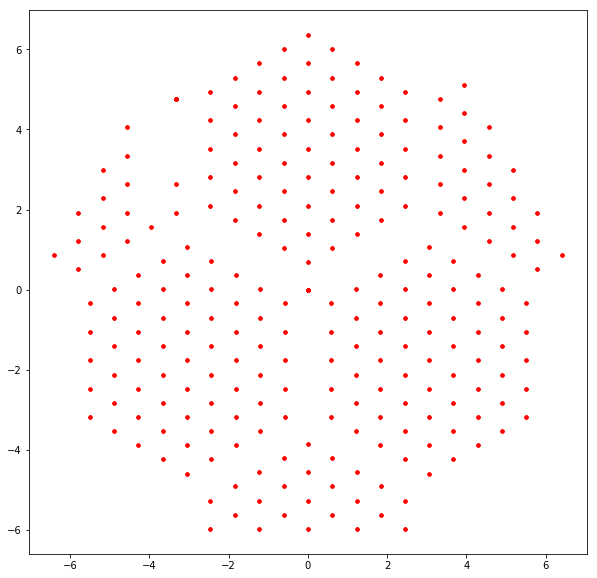

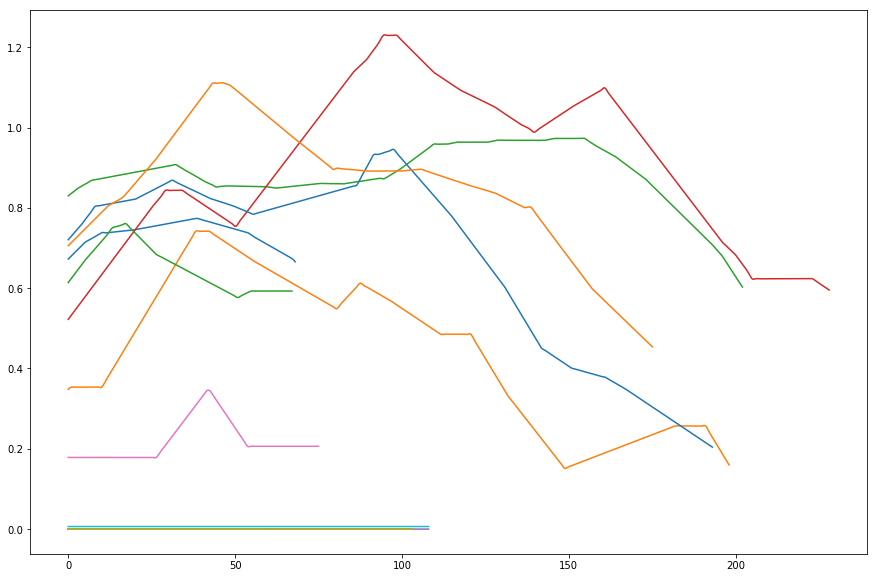

In [15]:
tod_id = 1485
plot_tracks_with_spread(tod_id)
plot_spreads(tod_id, convolve=110, sp=10)

## Try to produce animation

In [9]:
from IPython.display import HTML

KeyError: u'ffmpeg'

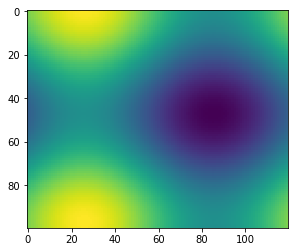

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)

def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,
